In [124]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [126]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [128]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [129]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [130]:
data=data.replace(np.nan,"None")

In [131]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [132]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [133]:
for i in data.columns:
    print (f"Number of unique values in {i}: {data[i].nunique()}")

Number of unique values in Person ID: 374
Number of unique values in Gender: 2
Number of unique values in Age: 31
Number of unique values in Occupation: 11
Number of unique values in Sleep Duration: 27
Number of unique values in Quality of Sleep: 6
Number of unique values in Physical Activity Level: 16
Number of unique values in Stress Level: 6
Number of unique values in BMI Category: 4
Number of unique values in Blood Pressure: 25
Number of unique values in Heart Rate: 19
Number of unique values in Daily Steps: 20
Number of unique values in Sleep Disorder: 3


In [134]:
data = pd.get_dummies(data, columns=['Gender', 'Occupation','BMI Category'], drop_first=True, dtype=int)

In [135]:
data.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Gender_Male',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight'],
      dtype='object')

In [136]:
data.drop(['Person ID','Age','Sleep Duration','Blood Pressure'],axis=1, inplace=True)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Quality of Sleep                 374 non-null    int64 
 1   Physical Activity Level          374 non-null    int64 
 2   Stress Level                     374 non-null    int64 
 3   Heart Rate                       374 non-null    int64 
 4   Daily Steps                      374 non-null    int64 
 5   Sleep Disorder                   374 non-null    object
 6   Gender_Male                      374 non-null    int32 
 7   Occupation_Doctor                374 non-null    int32 
 8   Occupation_Engineer              374 non-null    int32 
 9   Occupation_Lawyer                374 non-null    int32 
 10  Occupation_Manager               374 non-null    int32 
 11  Occupation_Nurse                 374 non-null    int32 
 12  Occupation_Sales Representative  374

In [138]:
def encoding(col):
    if col=="None":
        return 0
    elif col=="Sleep Apnea":
        return 1
    else:
        return 2
    

In [139]:
data['Sleep Disorder'] = data['Sleep Disorder'].apply(encoding)

In [140]:
data['Sleep Disorder'].unique()

array([0, 1, 2], dtype=int64)

In [141]:
data.corr()

,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
Quality of Sleep,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.357477,-0.291366,-0.269276,0.414126,0.184201,-0.013551,0.023495,-0.203211,-0.335950,-0.201176,-0.070702,-0.097806,0.023616,-0.126574,-0.280398
Physical Activity Level,0.192896,1.000000,-0.034134,0.136971,0.772723,-0.109225,0.001454,-0.088866,-0.158241,0.205104,-0.010382,0.459681,-0.102819,-0.208373,-0.090821,-0.055834,-0.225345,0.013626,-0.033234,0.080343
Stress Level,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.181296,0.396018,0.368038,-0.379980,-0.068714,-0.011250,0.045274,0.108196,0.278757,0.094753,0.036081,-0.167945,-0.026776,0.029459,0.157406
Heart Rate,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.220913,0.217105,0.158853,-0.324232,-0.048419,0.060605,0.218708,0.263356,0.135847,0.209811,0.134287,-0.246407,0.066138,0.567226,0.152863
Daily Steps,0.016791,0.772723,0.186829,-0.030309,1.000000,-0.161275,-0.014509,-0.002515,-0.232845,0.198237,-0.042199,0.378152,-0.173210,-0.154642,-0.094393,-0.065435,-0.184056,-0.007575,-0.355639,0.074473
Sleep Disorder,-0.357477,-0.109225,0.181296,0.220913,-0.161275,1.000000,-0.161131,-0.288487,-0.249345,-0.222127,-0.039922,0.182095,0.034603,0.465149,-0.015550,-0.015550,0.356877,-0.101440,0.160626,0.687725
Gender_Male,-0.291366,0.001454,0.396018,0.217105,-0.014509,-0.161131,1.000000,0.451647,-0.011959,0.342818,-0.052335,-0.497764,0.072543,0.302633,-0.105093,0.102869,-0.263264,-0.083915,0.130833,-0.358617
Occupation_Doctor,-0.269276,-0.088866,0.368038,0.158853,-0.002515,-0.288487,0.451647,1.000000,-0.217870,-0.183520,-0.025064,-0.238389,-0.035494,-0.148071,-0.050331,-0.050331,-0.167519,-0.058836,0.088822,-0.391728
Occupation_Engineer,0.414126,-0.158241,-0.379980,-0.324232,-0.232845,-0.249345,-0.011959,-0.217870,1.000000,-0.170634,-0.023304,-0.221650,-0.033001,-0.137674,-0.046797,-0.046797,-0.155757,0.014355,-0.074600,-0.320394
Occupation_Lawyer,0.184201,0.205104,-0.068714,-0.048419,0.198237,-0.222127,0.342818,-0.183520,-0.170634,1.000000,-0.019630,-0.186704,-0.027798,-0.115968,-0.039419,-0.039419,-0.131199,-0.057430,0.037168,-0.273807


<Axes: >

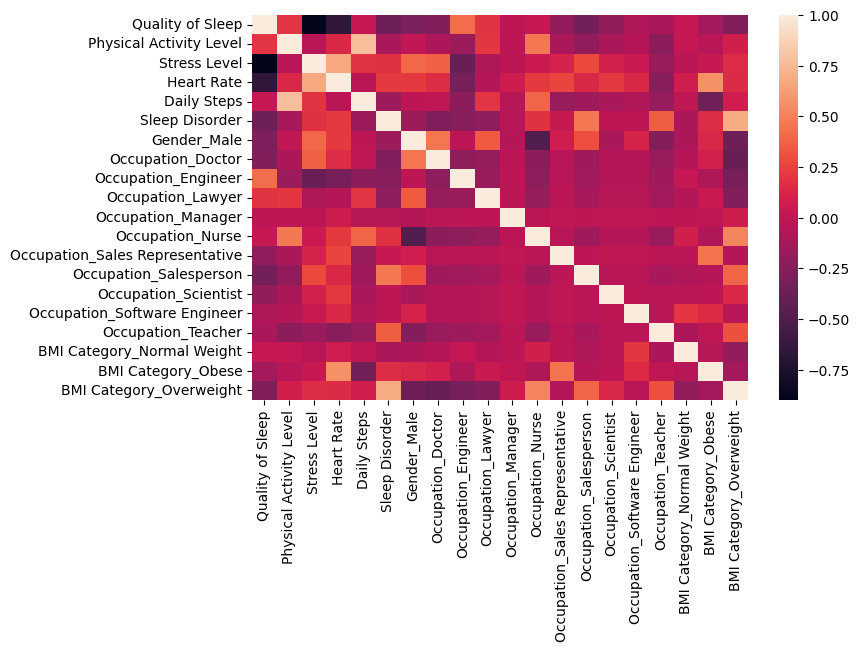

In [142]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

In [143]:
X = data.drop(['Sleep Disorder'], axis=1)
y=data['Sleep Disorder']

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
                         X, y, test_size=0.2, random_state=42)

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rfc=RandomForestClassifier()

In [148]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [149]:
predictions = rfc.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
print(confusion_matrix(y_test, predictions))

[[42  0  1]
 [ 1 11  4]
 [ 1  2 13]]


In [152]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.85      0.69      0.76        16
           2       0.72      0.81      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

